# <center>Biodiversity research</center>

## 0. Definition of goals and objectives of the project

- What percentage has conservation status?
- Which scientific names tend to be more vulnerable?
- Which park is the largest in the number of observations? How does this compare with the number of observations in different conservation status groups?
- What scientific name has the fewest observations in all parks in total?
- Which part of the common name tends to be part of the protected species common name?

## 1. Data preparation and preliminary data review

### A) Import Python modules

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

### B) Loading the Data

In [2]:
obs = pd.read_csv('observations.csv')
spec_inf = pd.read_csv('species_info.csv')

### C) Explore the Data

In [3]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
spec_inf.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
obs.info()
spec_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [6]:
spec_inf.conservation_status.unique()
spec_inf.conservation_status = spec_inf.conservation_status.where(~spec_inf.conservation_status.isna(), other='Not Evaluated')
spec_inf.info()
spec_inf.conservation_status.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


array(['Not Evaluated', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

### D) Data Wrangling, Cleaning and Tidying

According to the provided data in the "species_info.csv" table, some entries have missing values for the conservation status. 

These missing values indicate that certain species do not have a conservation status assigned, and they can be considered as structurally absent data. 

Therefore, at this stage, we can proceed with the data merging process without taking any specific actions for these missing values.

### E) Merging the Data

In [7]:
all_data=obs.merge(spec_inf, how='left')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  25632 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


## 2. Data analysis

### A) Let's view the distribution with and without the conservation status.

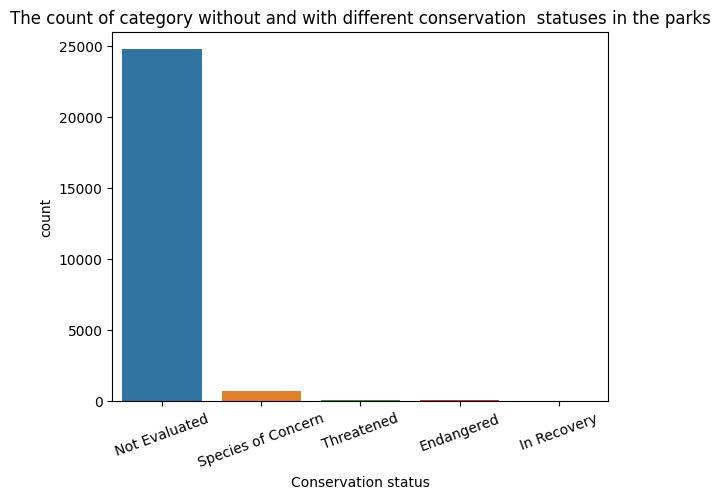

<Figure size 640x480 with 0 Axes>

In [8]:

sns.countplot(data=all_data, x='conservation_status')
plt.title('The count of category without and with different conservation  statuses in the parks')
plt.xticks(rotation=20)
plt.xlabel('Conservation status')
plt.show()
plt.clf()

The scale does not allow to see differences in the number of species of special conservation status.

A separate graph is needed to compare the number of species with conservation status.

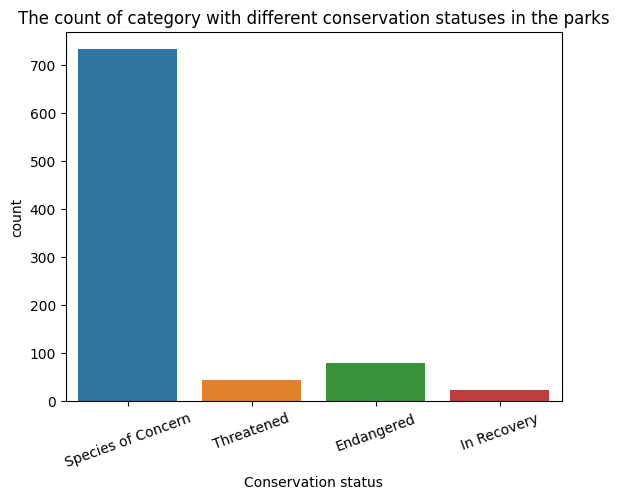

<Figure size 640x480 with 0 Axes>

In [9]:

sns.countplot(data=all_data[all_data.conservation_status!='Not Evaluated'], x='conservation_status')
plt.title('The count of category with different conservation statuses in the parks')
plt.xticks(rotation=20)
plt.xlabel('Conservation status')
plt.show()
plt.clf()

In [15]:
print('The ratio of living organisms with conservation status',round(100*len(all_data[all_data.conservation_status !=
      'Not Evaluated'])/len(all_data), 1), '%')
print('and this is approximately',round(100*np.sum(all_data[all_data.conservation_status !=
      'Not Evaluated'].observations)/np.sum(all_data.observations), 1), '% all observations in the parks')


The ratio of living organisms with conservation status 3.4 %
and this is approximately 2.8 % all observations in the parks


### B) Let's see what categories of living organisms are in the parks and which more often have a conservation status.

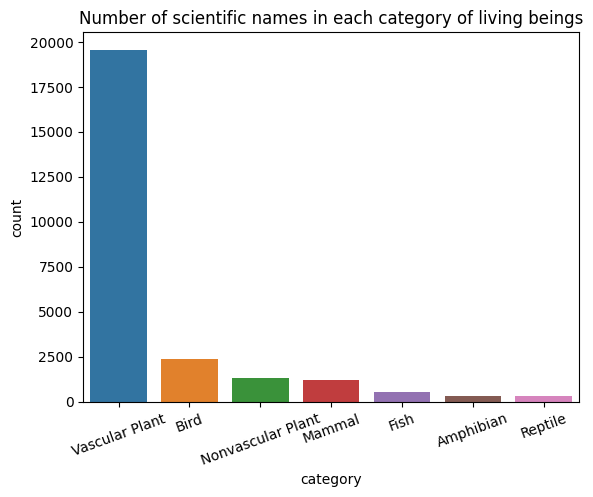

<Figure size 640x480 with 0 Axes>

In [16]:
ordering = all_data.category.value_counts().index
sns.countplot(data=all_data, x='category', order=ordering)
plt.title('Number of all scientific names in each category of living beings')
plt.xticks(rotation=20)
plt.show()
plt.clf()

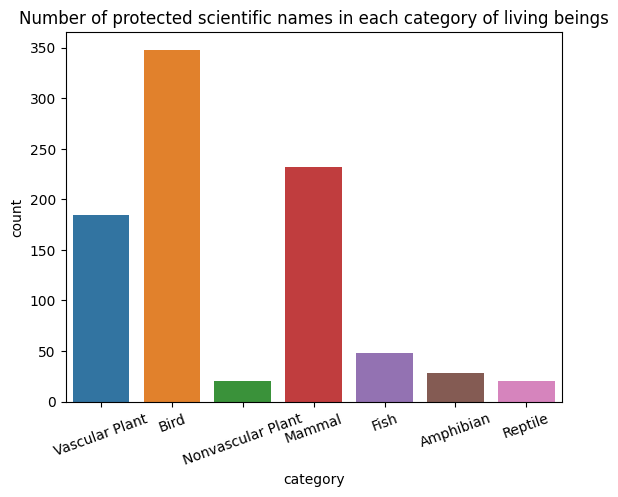

<Figure size 640x480 with 0 Axes>

In [100]:
sns.countplot(data=all_data[all_data.conservation_status!='Not Evaluated'], x='category', order=ordering)
plt.title('Number of protected scientific names in each category of living beings')
plt.xticks(rotation=20)
plt.show()
plt.clf()

It appears that some species tend to have conservation status. Let's try to identify the percentage of such species in each category.

In [101]:
all_obs_in_cat = all_data.groupby('category').observations.sum()
satus_obs_in_cat = all_data[all_data.conservation_status!='Not Evaluated'].groupby('category').observations.sum()
print('The percentage of observations with a status for the category.')
for i in satus_obs_in_cat.index:
    print(f'For {i} percentage is {round(100*satus_obs_in_cat[i]/all_obs_in_cat[i],1)}%')
print()
print('The percentage of scientific names with a status for the category.')
all_name_in_cat = all_data.groupby('category').scientific_name.count()
satus_name_in_cat = all_data[all_data.conservation_status!='Not Evaluated'].groupby('category').scientific_name.count()
for i in satus_obs_in_cat.index:
    print(f'For {i} percentage is {round(100*satus_name_in_cat[i]/all_name_in_cat[i],1)}%')

The percentage of observations with a status for the category.
For Amphibian percentage is 6.1%
For Bird percentage is 12.9%
For Fish percentage is 5.8%
For Mammal percentage is 15.4%
For Nonvascular Plant percentage is 1.4%
For Reptile percentage is 5.5%
For Vascular Plant percentage is 0.8%

The percentage of scientific names with a status for the category.
For Amphibian percentage is 8.5%
For Bird percentage is 14.7%
For Fish percentage is 9.2%
For Mammal percentage is 19.3%
For Nonvascular Plant percentage is 1.5%
For Reptile percentage is 6.2%
For Vascular Plant percentage is 0.9%


Birds and mammals are more often protected.

### C) Let's see which park has more observations. And how these data are similar to observations in each conservation status.

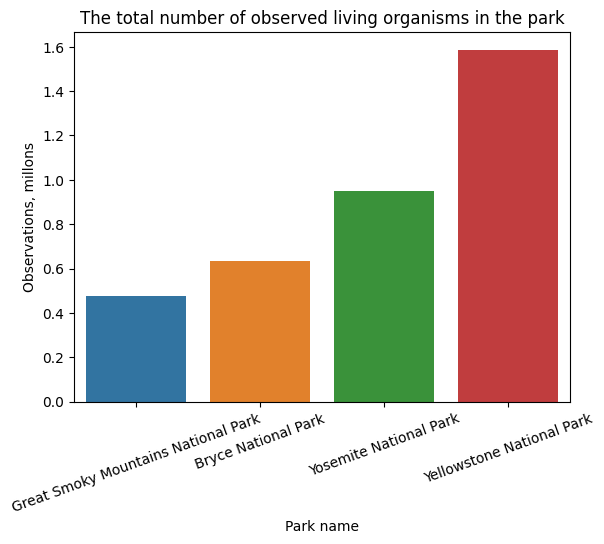

Index(['Great Smoky Mountains National Park', 'Bryce National Park',
       'Yosemite National Park', 'Yellowstone National Park'],
      dtype='object', name='park_name')


<Figure size 640x480 with 0 Axes>

In [97]:
def func(x):
    return sum(x)/1_000_000
ordering1 = all_data.groupby('park_name').observations.sum().sort_values().index
sns.barplot(data=all_data, x='park_name', y='observations', estimator=func, errorbar=None, order=ordering1)
plt.title('The total number of observed living organisms in the park')
plt.xlabel('Park name')
plt.ylabel('Observations, millons')
plt.xticks(rotation=20)
plt.show()
plt.clf()
print(ordering1)


It looks like Yellowstone is the largest park in this dataset.

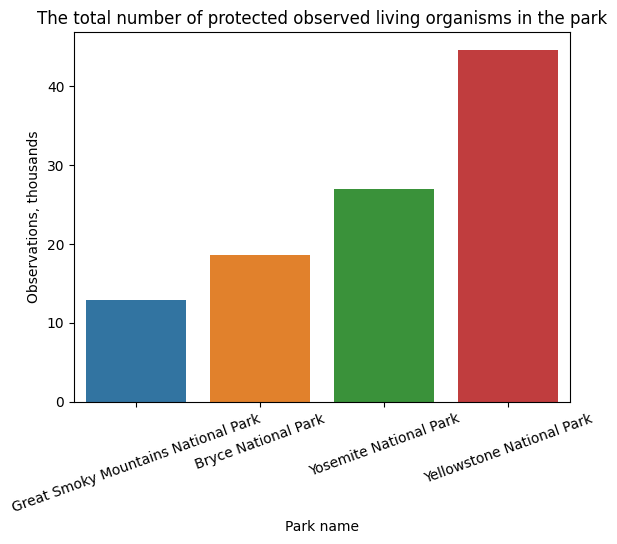

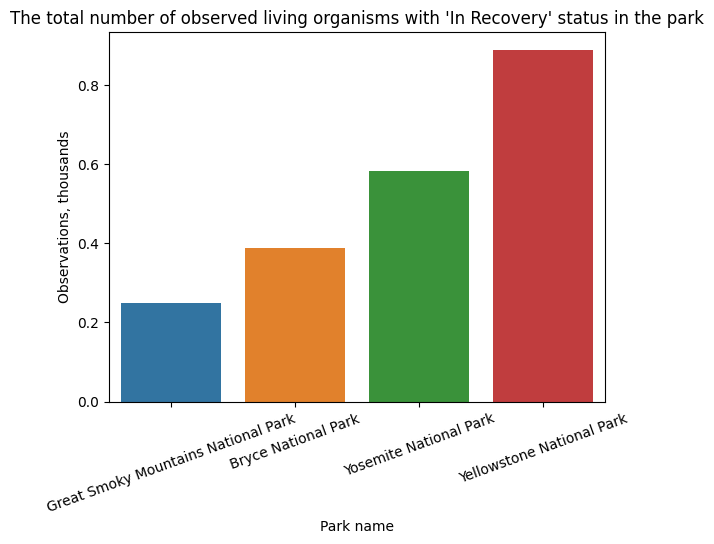

<Figure size 640x480 with 0 Axes>

In [102]:
def func(x):
    return sum(x)/1_000

sns.barplot(data=all_data[all_data.conservation_status!='Not Evaluated'], x='park_name', y='observations', estimator=func, errorbar=None, order=ordering1)
plt.title('The total number of protected observed living organisms in the park')
plt.xlabel('Park name')
plt.ylabel('Observations, thousands')
plt.xticks(rotation=20)
plt.show()
plt.clf()


sns.barplot(data=all_data[all_data.conservation_status=='In Recovery'], x='park_name', y='observations', estimator=func, errorbar=None, order=ordering1)
plt.title("The total number of observed living organisms with 'In Recovery' status in the park")
plt.xlabel('Park name')
plt.ylabel('Observations, thousands')
plt.xticks(rotation=20)
plt.show()
plt.clf()

### D) Let's find the scientific name of the smallest observations in the parks in total.

In [50]:
total_obs=all_data.groupby('scientific_name').observations.sum().sort_values()
print('The rarest scientific name:', total_obs.index[0])
print(f'In total, there are {total_obs.iloc[0]} observations across all parks.')


The rarest scientific name: Grus americana
In total, there are 131 observations across all parks.


### E) Let's explore common names, perhaps some parts are more common than others, and how this is related to the status of conservation.

In [103]:

word_counts_stat = all_data[all_data.conservation_status!='Not Evaluated'].common_names.str.lower().str.replace('[.,!?:]','', regex=True).str.split(expand=True).stack().value_counts()
print(word_counts_stat.head())


myotis    140
bat       104
brown     104
little     72
wolf       64
Name: count, dtype: int64


In [112]:
word_counts = all_data.common_names.str.lower().str.replace('[.,!?:]','', regex=True).str.split(expand=True).stack().value_counts()
print('myotis', word_counts['myotis'])
print('bat', word_counts['bat'])
print('wolf', word_counts['wolf'])


myotis 164
bat 228
wolf 68


## 3. Conclusions

- The percentage of living organisms with a protected status is 3.4%, which accounts for approximately 2.8% of all observations in the parks.
- According to these data, birds and mammals tend to have a higher tendency to have a conservation status compared to other categories.
- According to the data, Yellowstone National Park has the highest number of living organisms. The distribution of organisms in the parks, both in terms of total count and those with a conservation status, is roughly equal.
- The rarest organism is Grus americana, with only 131 observations.
- Organisms containing 'myotis', 'bat', and 'wolf' in their names are most likely to have conservation status. However, if the term 'bat' appears frequently without a conservation status, the presence of 'myotis' raises more concern. It is interesting to note that while there are some organisms with 'wolf' in their names that do not have a conservation status, all mammal wolves in this dataset have a conservation status (because of vascular plants' names that consist of 'wolf'). This finding raises concerns and warrants further investigation.